In [1]:
# Require: tensorflow-1.13
!pip install tensorflow=='1.13.1'
# Require: pandas-0.25+
!pip install pandas --upgrade
# if upgraded, please restart the kernel to let it take effect

Requirement already up-to-date: pandas in /usr/local/envs/py3env/lib/python3.5/site-packages (0.25.3)


In [2]:
import sys
sys.path.append('data_generation')
sys.path.append('util')
sys.path.append('neural_networks')
sys.path.append('experiments')

In [3]:
import tensorflow as tf
from dataset_manager import DataSetManager
from dataset import DataSetKey
from my_enums import Pricers,Generators
from ds_spec import DsSpecs
from experiment_manager import ExperimentManager
from my_config import Config
import os
from multiprocessing import Process
import time
import pandas as pd
import pickle
from metrics import Metrics
import matplotlib.pyplot as plt
import itertools

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Load Dataset Manager and Experiment Manager (Connections to raw data, and trained networks)

In [19]:
dsm = DataSetManager.get_default_in_mem_DSM()

Loading DataSetKey(Generators.Uniform, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_0
Loading DataSetKey(Generators.Uniform, Pricers.Whaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_1
Loading DataSetKey(Generators.Uniform, Pricers.JuZhongWhaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_2
Loading DataSetKey(Generators.Halton, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_3
Loading DataSetKey(Generators.Halton, Pricers.Whaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_4
Loading DataSetKey(Generators.Halton, Pricers.JuZhongWhaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_5
Loading DataSetKey(Generators.Uniform, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_2_1_1) at /content/datalab/Data/datasets/ds_6
Loading DataSetKey(Generators.Uniform, Pricers.Whaley, 

In [5]:
em = ExperimentManager.create_or_load(os.path.join(Config.experiments_dir,'set2'),dsm)

In [6]:
em_df = em.get_info_df()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_217/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_472/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_51/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_482/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_431/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_412/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_153/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_481/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_247/model/model-50
INFO:tensorflow:Restori

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_168/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_218/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_425/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_212/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_142/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_223/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_460/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_305/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_24/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_61/model/model-50
INFO:tensorf

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_253/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_399/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_170/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_286/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_377/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_14/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_441/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_372/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_40/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_213/model/model-50
INFO:tensorf

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_165/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_392/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_338/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_522/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_214/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_192/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_290/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_34/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_491/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_199/model/model-50
INFO:tensor

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_251/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_301/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_42/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_3/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_307/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_73/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_359/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_167/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_180/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_194/model/model-50
INFO:tensorflo

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_164/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_255/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_200/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_446/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_98/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_120/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_263/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_430/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_125/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_81/model/model-50
INFO:tensorf

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_0/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_414/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_46/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_406/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_355/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_474/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_7/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_436/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_228/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_56/model/model-50
INFO:tensorflow:

In [7]:
em_df

,American Pricer,European Pricer,Generator,Specs,Activation Funcs,drop rates,epochs run,nodes,train_size,exp_dir
0,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"[tanh, elu]","[0.0, 0.0]",50,"[5, 5]",10000,/content/datalab/Experiments/set2/exp_217
1,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"[leaky_relu, elu]","[0.0, 0.0]",50,"[5, 5]",25000,/content/datalab/Experiments/set2/exp_472
2,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"[elu, leaky_relu]","[0.0, 0.0]",50,"[10, 10]",2000,/content/datalab/Experiments/set2/exp_51
3,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"[sigmoid, elu]","[0.0, 0.0]",50,"[5, 5]",25000,/content/datalab/Experiments/set2/exp_482
4,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"[leaky_relu, leaky_relu]","[0.0, 0.0]",50,"[20, 20]",20000,/content/datalab/Experiments/set2/exp_431
...,...,...,...,...,...,...,...,...,...,...
535,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"[elu, sigmoid]","[0.0, 0.0]",50,"[5, 5]",20000,/content/datalab/Experiments/set2/exp_388
536,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"[tanh, relu]","[0.0, 0.0]",50,"[10, 10]",2000,/content/datalab/Experiments/set2/exp_60
537,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"[sigmoid, sigmoid]","[0.0, 0.0]",50,"[10, 10]",5000,/content/datalab/Experiments/set2/exp_148
538,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"[tanh, elu]","[0.0, 0.0]",50,"[20, 20]",20000,/content/datalab/Experiments/set2/exp_447


Compute $r^2$ for every possible architecture (all layers with all activations)

In [8]:
def get_arch_r2s(archs,dskey,learn_rate,train_size,epoch,exp_man):
    exps = [exp_man.get_exp(dskey,(arch,learn_rate),train_size) for arch in archs]
    r2s = [exp.get_metric(Metrics.r2,exp.get_outsample_data(1000),epoch) for exp in exps]
    return pd.DataFrame({'nodes':[tuple(n for n,af,dr in arch) for arch in archs],
                         'afs':[tuple(af.__name__ for n,af,dr in arch) for arch in archs],
                         'arch':archs,
                         'r2':r2s})

In [12]:
def get_layer_set_r2s(layer_nodes,afs,dskey,learn_rate,train_size,epoch,exp_man):
    af_sets = [tuple(j) for j in set(list(itertools.product(afs,repeat = len(layer_nodes))))]
    archs = [tuple(zip(layer_nodes,afs,tuple(0.0 for n in layer_nodes))) for afs in af_sets]
    return get_arch_r2s(archs,dskey,learn_rate,train_size,epoch,exp_man)

In [13]:
def get_all_r2s(layer_sets,afs,dskey,learn_rate,train_size,epoch,exp_man):
    dfs = [get_layer_set_r2s(layer_set,afs,dskey,learn_rate,train_size,epoch,exp_man)
           for layer_set in layer_sets]
    return pd.concat(dfs,axis=0).reset_index(drop=True)

In [14]:
dskey = DataSetKey(Generators.Uniform,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1)
learn_rate = 0.1
layer_sets = [(5,),(10,),(20,),(5,5),(10,10),(20,20)]
afs = [tf.nn.relu,tf.nn.leaky_relu,tf.nn.elu,tf.nn.sigmoid,tf.nn.tanh]
df = get_all_r2s(layer_sets,afs,dskey,learn_rate,25000,50,em)

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_453/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_450/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_451/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_454/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_452/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_458/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_455/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_456/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_459/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_457/model/model-50
INFO:tenso

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_529/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_522/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_528/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_533/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_515/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_538/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_537/model/model-50


In [15]:
df.drop(['arch'],axis=1)

,afs,nodes,r2
0,"(sigmoid,)","(5,)",41.764503
1,"(relu,)","(5,)",63.333832
2,"(leaky_relu,)","(5,)",59.983921
3,"(tanh,)","(5,)",70.967033
4,"(elu,)","(5,)",54.736183
...,...,...,...
85,"(elu, sigmoid)","(20, 20)",79.981293
86,"(sigmoid, sigmoid)","(20, 20)",59.187984
87,"(relu, relu)","(20, 20)",96.014847
88,"(tanh, sigmoid)","(20, 20)",79.398994


Find the best activation funcs for each Layer Architecture

In [16]:
idx = df.groupby(['nodes'])['r2'].transform(max) == df['r2']
df[idx].drop(['arch'],axis=1)

,afs,nodes,r2
3,"(tanh,)","(5,)",70.967033
8,"(tanh,)","(10,)",76.508530
11,"(relu,)","(20,)",83.518394
32,"(tanh, relu)","(5, 5)",85.670975
42,"(relu, leaky_relu)","(10, 10)",92.806152
78,"(elu, relu)","(20, 20)",96.394295


Plot the relationship between Training Size and $r^2$ at different epochs for the optimal architectures of each neuron setwork

In [17]:
df2 = df[idx].reset_index(drop=True)
train_sizes = [2000,5000,10000,15000,20000,25000]
epochs = [10,20,30,40,50]
all_r2s = []
for i in range(df2.shape[0]):
    epoch_r2s = []
    model_key = (df2['arch'][i],learn_rate)
    exps = [em.get_exp(dskey,model_key,train_size) for train_size in train_sizes]
    for j in epochs:
        r2s = [exp.get_metric(Metrics.r2,exp.get_outsample_data(1000),j) for exp in exps]
        epoch_r2s.append(r2s)
    all_r2s.append(epoch_r2s)
        #layer_axes[i].plot(train_sizes,r2s,label='epoch_{}'.format(j))
    #layer_axes[i].legend()

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_4/model/model-10
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_94/model/model-10
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_184/model/model-10
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_274/model/model-10
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_364/model/model-10
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_454/model/model-10
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_4/model/model-20
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_94/model/model-20
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_184/model/model-20
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_274/model/model-20
INFO:tensorflow:

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_10/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_100/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_190/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_280/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_370/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_460/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_35/model/model-10
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_125/model/model-10
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_215/model/model-10
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_305/model/model-10
INFO:tensorf

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_525/model/model-30
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_75/model/model-40
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_165/model/model-40
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_255/model/model-40
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_345/model/model-40
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_435/model/model-40
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_525/model/model-40
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_75/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_165/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set2/exp_255/model/model-50
INFO:tensorf

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


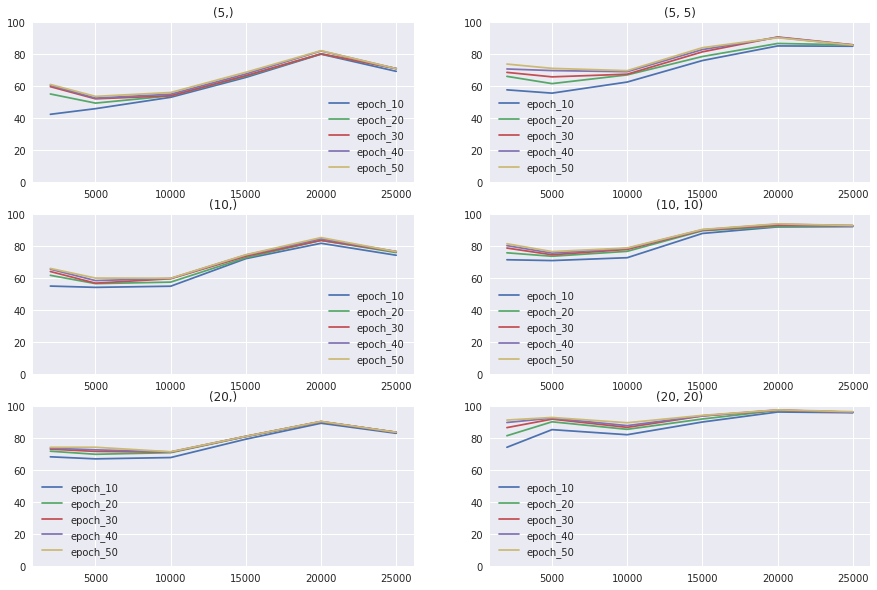

In [18]:
fig,axes = plt.subplots(3,2,figsize=(15,10))
layer_sets = [(5,),(10,),(20,),(5,5),(10,10),(20,20)]
layer_axes = [axes[0][0],axes[1][0],axes[2][0],axes[0][1],axes[1][1],axes[2][1]]
for i in range(len(all_r2s)):
    for epoch_r2s,epoch in zip(all_r2s[i],epochs):
        layer_axes[i].plot(train_sizes,epoch_r2s,label='epoch_{}'.format(epoch))
    layer_axes[i].legend()
    layer_axes[i].set_ylim(0, 100)
    layer_axes[i].set_title("{}".format(layer_sets[i]))

Check the attributes of datasets

In [20]:
ds_1 = dsm.get_ds(DataSetKey(Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1))
ds_2 = dsm.get_ds(DataSetKey(Generators.Uniform,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1))

In [21]:
ds_1.get_info_df()

,American Pricer,European Pricer,Generator,Specs,Spec Desc,Input Cols,Output Cols,Num Inputs,Num Outputs,location
0,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_3_3_1,"Fixing K = 1, Using EU_Price in inputs","['S', 'r', 'q', 'sigma', 'T', 'EU_Price']",['Premium'],600000,600000,/content/datalab/Data/datasets/ds_23


In [22]:
ds_2.get_info_df()

,American Pricer,European Pricer,Generator,Specs,Spec Desc,Input Cols,Output Cols,Num Inputs,Num Outputs,location
0,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Uniform,DsSpecs.SPEC_3_3_1,"Fixing K = 1, Using EU_Price in inputs","['S', 'r', 'q', 'sigma', 'T', 'EU_Price']",['Premium'],600000,600000,/content/datalab/Data/datasets/ds_20


In [23]:
x1,y1 = ds_1.get_data(1000)
x2,y2 = ds_2.get_data(1000)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


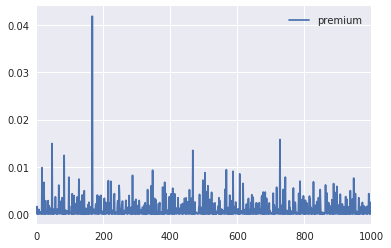

In [28]:
import pandas as pd
%matplotlib inline
y1_df = pd.DataFrame(y1, columns=['premium'])
y1_df.plot()

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


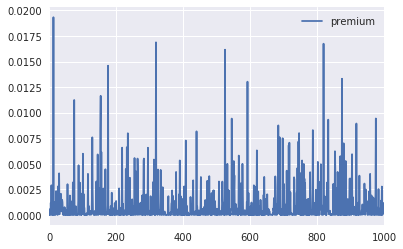

In [25]:
import pandas as pd
%matplotlib inline
y2_df = pd.DataFrame(y2, columns=['premium'])
y2_df.plot()